In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme()

In [56]:
def get_reservoir(name):
    reservoir = pd.read_csv(f'./data/{name}.csv')
    reservoir['FLOW_DATE'] = pd.to_datetime(reservoir['FLOW_DATE'])
    reservoir = reservoir.sort_values(['FLOW_DATE'], ascending=[True])
    reservoir = reservoir[~reservoir['RES_LEVEL_FT'].str.contains(';')]
    reservoir['RES_LEVEL_FT'] = reservoir["RES_LEVEL_FT"].astype(float)
    
    df2 = reservoir.filter(["FLOW_DATE","RES_LEVEL_FT"])
    df3 = reservoir.filter(["FLOW_DATE","PRESENT_STORAGE_TMC"])
    df2.columns = ['date','value']
    df3.columns = ['date','value']
    df2['metric'] = 'level_ft'
    df3['metric'] = 'tmc'
    
    df2['value'] = (df2['value']-df2['value'].mean())/(df2['value'].std())
    df3['value'] = (df3['value']-df3['value'].mean())/(df3['value'].std())
    
    df4 = pd.concat([df2,df3])
    
    sns.lineplot(data=df4,x="date",y="value", hue="metric")
    plt.legend(loc="upper right")
    print(reservoir.shape)
    return reservoir

(3312, 10)


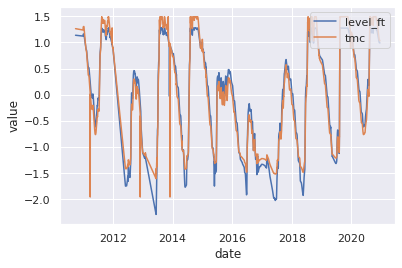

In [58]:
krs = get_reservoir('KRS')

(3320, 10)


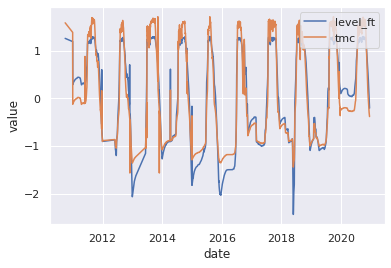

In [59]:
harangi = get_reservoir('Harangi')

(3313, 10)


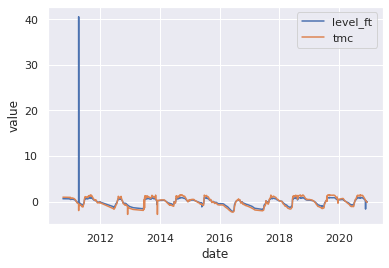

In [60]:
kabini = get_reservoir('kabini')

(3313, 10)


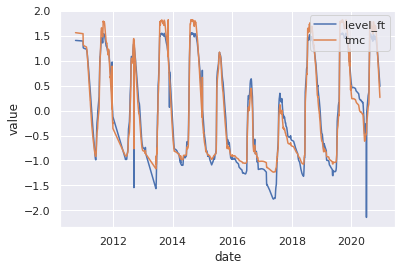

In [61]:
hemavathi = get_reservoir('Hemavathi')

---

<AxesSubplot:xlabel='row', ylabel='RES_LEVEL_FT'>

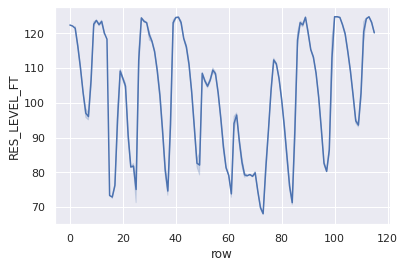

In [84]:
krs['MONTH'] = krs['FLOW_DATE'].dt.month
a = krs.filter(['YEAR','MONTH']).drop_duplicates().sort_values(['YEAR','MONTH']).reset_index()
a['row'] = a.index
a = pd.merge(krs, a, on=['YEAR','MONTH'], how="left")
sns.lineplot(data=a, x="row", y="RES_LEVEL_FT")

In [71]:
krs

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY,week_year
941,13062,K.R.S,2010,39,2010-09-30,46.18,122.41,2706,6840,K.R.S-2010-09-30,2010_39
942,13231,K.R.S,2010,52,2010-12-31,45.81,122.13,2668,6795,K.R.S-2010-12-31,2010_52
0,51,K.R.S,2011,1,2011-01-01,46.42,122.59,2029,2000,K.R.S-2011-01-01,2011_1
1,52,K.R.S,2011,1,2011-01-02,46.54,122.68,3084,1490,K.R.S-2011-01-02,2011_1
2,53,K.R.S,2011,1,2011-01-03,46.64,122.75,2776,1491,K.R.S-2011-01-03,2011_1
...,...,...,...,...,...,...,...,...,...,...,...
3308,43915,K.R.S,2020,50,2020-12-12,43.04,120.00,3496,3308,K.R.S-2020-12-12,2020_50
3309,43916,K.R.S,2020,50,2020-12-13,43.02,119.98,3197,3300,K.R.S-2020-12-13,2020_50
3310,43917,K.R.S,2020,50,2020-12-14,42.98,119.95,3026,3273,K.R.S-2020-12-14,2020_50
3311,43918,K.R.S,2020,50,2020-12-15,42.92,119.90,2530,3068,K.R.S-2020-12-15,2020_50
